In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data.csv')

In [2]:
df['Date_Time'] = df['Date_Time'].str.replace(' 24:00', ' 00:00')

In [3]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'], dayfirst=True, errors='coerce')

In [4]:
df.set_index('Date_Time', inplace=True)
df = df[df.index.year != 2012]

In [5]:
df.isnull().sum()

SO2 (ppb)        48204
NOx (ppb)        22857
CO (ppm)         35188
CO (8hr)         33587
O3               31911
O3 (8hr)         30432
PM2.5 (ug/m3)    25732
PM10 (ug/m3)     17464
dtype: int64

In [9]:
df.head()

,SO2 (ppb),NOx (ppb),CO (ppm),CO (8hr),O3,O3 (8hr),PM2.5 (ug/m3),PM10 (ug/m3),Year
Date_Time,,,,,,,,,
NaT,5.76,49.45,1.48,1.11250,0.11,0.19375,190.50,405.21,NaN
NaT,5.96,54.92,1.55,1.23750,0.13,0.17750,246.60,443.22,NaN
NaT,6.20,58.57,1.59,1.34125,0.16,0.16875,232.03,323.06,NaN
NaT,5.99,60.65,1.62,1.42000,0.07,0.15500,175.63,231.68,NaN
NaT,6.50,62.07,1.68,1.48500,0.08,0.13375,164.25,222.34,NaN


C:\Users\Rana Hamid\AppData\Local\Temp\ipykernel_2916\273003650.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Date_Time', y=f'{pollutant}', data=monthly_mean_all_years, palette=sns.color_palette("husl", 12), saturation=0.65, linewidth= 0.5)
C:\Users\Rana Hamid\AppData\Local\Temp\ipykernel_2916\273003650.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Date_Time', y=f'{pollutant}', data=monthly_mean_all_years, palette=sns.color_palette("husl", 12), saturation=0.65, linewidth= 0.5)
C:\Users\Rana Hamid\AppData\Local\Temp\ipykernel_2916\273003650.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the

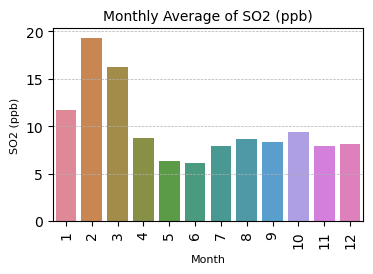

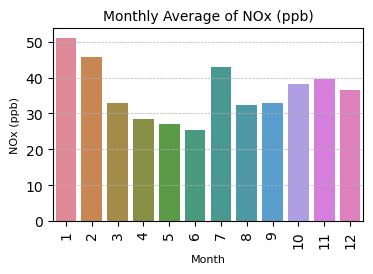

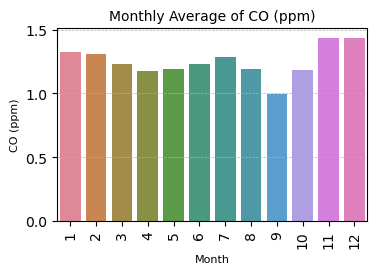

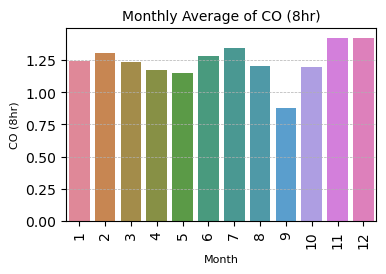

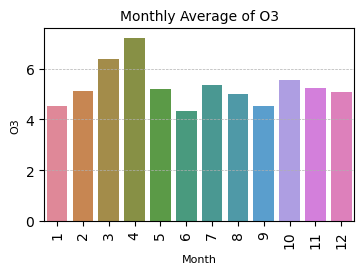

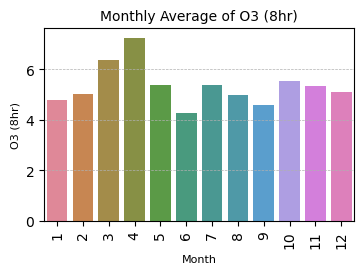

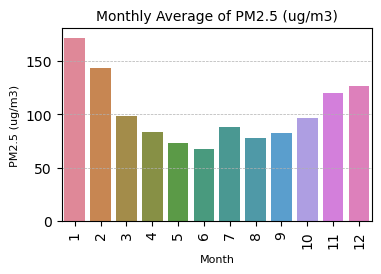

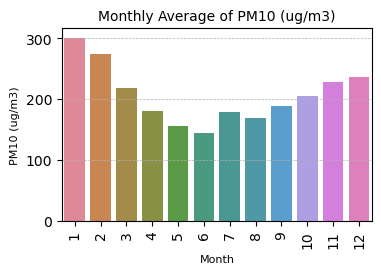

In [5]:
# Resample to monthly frequency and calculate monthly mean
monthly_avg = df.resample('M').mean()

# Group by month and calculate mean across all years
monthly_mean_all_years = monthly_avg.groupby(monthly_avg.index.month).mean()

# Plotting
pollutants = ['SO2 (ppb)', 'NOx (ppb)', 'CO (ppm)', 'CO (8hr)', 'O3', 'O3 (8hr)', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)']

for pollutant in pollutants:
    plt.figure(figsize=(4, 2.5))
    plt.xticks(rotation = 90)
    ax = sns.barplot(x='Date_Time', y=f'{pollutant}', data=monthly_mean_all_years, palette=sns.color_palette("husl", 12), saturation=0.65, linewidth= 0.5)
    ax.set_title(f'Monthly Average of {pollutant}', fontsize = 10)
    ax.set_xlabel('Month', fontsize= 8)
    ax.set_ylabel(f'{pollutant}', fontsize = 8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

C:\Users\Rana Hamid\AppData\Local\Temp\ipykernel_2916\2353540887.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Date_Time', y=f'{pollutant}', data=yearly_mean_all_years, palette=sns.color_palette("husl", 12), saturation=0.65, linewidth= 0.5)
C:\Users\Rana Hamid\AppData\Local\Temp\ipykernel_2916\2353540887.py:10: UserWarning: The palette list has more values (12) than needed (9), which may not be intended.
  ax = sns.barplot(x='Date_Time', y=f'{pollutant}', data=yearly_mean_all_years, palette=sns.color_palette("husl", 12), saturation=0.65, linewidth= 0.5)
C:\Users\Rana Hamid\AppData\Local\Temp\ipykernel_2916\2353540887.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(

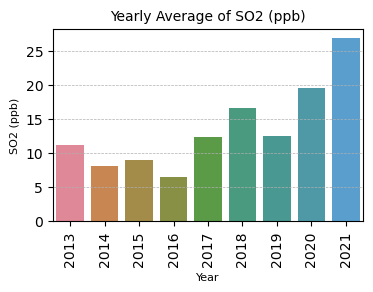

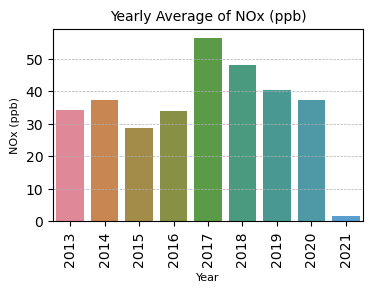

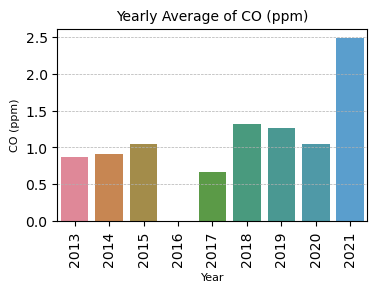

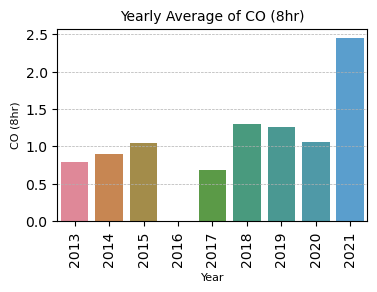

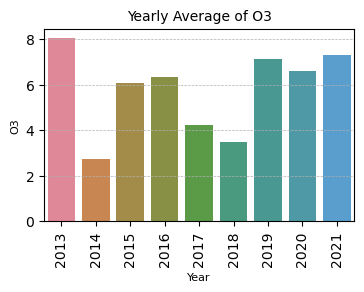

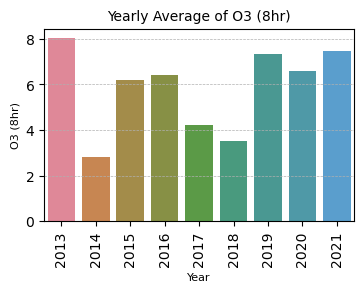

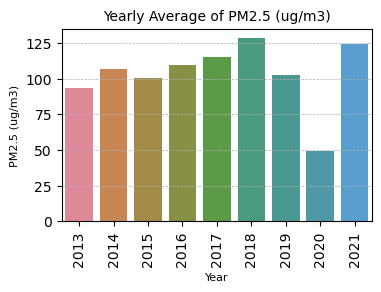

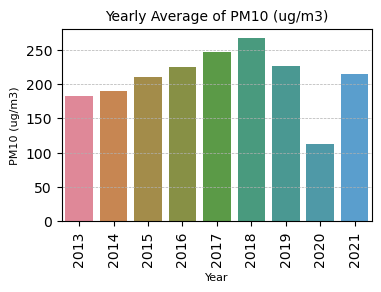

In [6]:

yearly_avg = df.resample('Y').mean()

yearly_mean_all_years = yearly_avg.groupby(yearly_avg.index.year).mean()

pollutants = ['SO2 (ppb)', 'NOx (ppb)', 'CO (ppm)', 'CO (8hr)', 'O3', 'O3 (8hr)', 'PM2.5 (ug/m3)', 'PM10 (ug/m3)']

for pollutant in pollutants:
    plt.figure(figsize=(4, 2.5))
    plt.xticks(rotation = 90)
    ax = sns.barplot(x='Date_Time', y=f'{pollutant}', data=yearly_mean_all_years, palette=sns.color_palette("husl", 12), saturation=0.65, linewidth= 0.5)
    ax.set_title(f'Yearly Average of {pollutant}', fontsize = 10)
    ax.set_xlabel('Year', fontsize= 8)
    ax.set_ylabel(f'{pollutant}', fontsize = 8)
    ax.grid(axis='y', linestyle='--', linewidth=0.5)

In [7]:
# Extract year from the index
df['Year'] = df.index.year

# Group by year and calculate percentage of missing values
missing_percentage = df.groupby(df['Year']).apply(lambda x: (x.isnull().sum() / len(x)) * 100)


table_string = missing_percentage.to_string()

# Print the table
print(table_string)

        SO2 (ppb)  NOx (ppb)    CO (ppm)    CO (8hr)         O3   O3 (8hr)  PM2.5 (ug/m3)  PM10 (ug/m3)  Year
Year                                                                                                         
2013.0   8.998843  12.557870   19.039352    8.767361   8.998843   5.642361      41.001157     14.756944   0.0
2014.0  34.172454  30.410880   24.392361   25.057870  24.797454  26.331019      29.687500     17.245370   0.0
2015.0  68.315972  10.387731   14.438657   17.476852  38.194444  40.827546      37.847222     16.608796   0.0
2016.0  76.643519   7.800926  100.000000  100.000000   8.009259   9.328704      25.231481     16.203704   0.0
2017.0  58.585859  41.266835   92.340067   94.023569  32.070707  34.154040      43.055556     28.009259   0.0
2018.0  44.873272   9.523810   58.813364   57.411674  39.784946  37.039171      28.398618     17.818740   0.0
2019.0  30.812757  29.578189   17.824074   11.574074  45.730453  41.075103      23.096708     37.088477   0.0
2020.0  98